In [3]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')



# Reading the Data

In [4]:
train_data= pd.read_csv('aug_train.csv')
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
train_data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
train_data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [9]:
train_data.drop(['enrollee_id', 'city'], axis=1, inplace=True)
train_data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


**Dividing the columns into categorical and numerical for ease in future**

In [10]:
num_cols= ['city_development_index' ,'training_hours']
cat_cols= train_data.drop(['city_development_index' ,'training_hours', 'target'], axis=1).columns

In [11]:
cat_cols

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

# Exploratory Data Analysis

In [14]:
import pandas_profiling
train_data.profile_report()

# Preprocessing the Data

In [15]:
train_data['company_size']= train_data['company_size'].replace('10/49', '10-49')

In [16]:
exp_counts= train_data['experience'].value_counts()
exp_counts

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

**Many values for experience so grouping all values under 600 to one category in order to prevent too many variables while encoding**

In [17]:
mask= train_data['experience'].isin(exp_counts[exp_counts<600].index)
train_data['experience'][mask]= 'other'
train_data['experience'].value_counts()

other    4132
>20      3286
5        1430
4        1403
3        1354
6        1216
2        1127
7        1028
10        985
9         980
8         802
15        686
11        664
Name: experience, dtype: int64

In [18]:
train_data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,other,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.8+ MB


# Encoding Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

for col in cat_cols:
    train_data[col] = train_data[col].astype(str)
    train_data[col]= le.fit_transform(train_data[col])


In [24]:
train_data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1,0,3,0,5,11,8,6,0,36,1.0
1,0.776,1,1,3,0,5,2,4,5,4,47,0.0
2,0.624,3,1,0,0,5,6,8,6,6,83,0.0
3,0.789,3,1,2,0,1,13,8,5,6,52,1.0
4,0.767,1,0,3,2,5,11,4,1,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,1,1,3,0,2,13,8,6,0,42,1.0
19154,0.920,1,0,3,0,5,13,8,6,3,52,1.0
19155,0.920,1,0,3,0,5,11,4,5,3,44,0.0
19156,0.802,1,0,3,1,6,13,5,5,1,97,0.0


In [25]:
train_data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1,0,3,0,5,11,8,6,0,36,1.0
1,0.776,1,1,3,0,5,2,4,5,4,47,0.0
2,0.624,3,1,0,0,5,6,8,6,6,83,0.0
3,0.789,3,1,2,0,1,13,8,5,6,52,1.0
4,0.767,1,0,3,2,5,11,4,1,3,8,0.0


<AxesSubplot:>

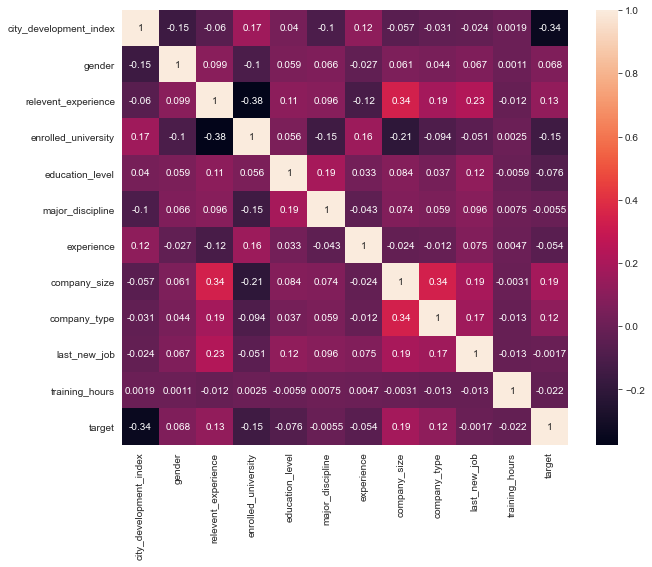

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True)

# Dealing with Missing Values

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

imputer = IterativeImputer(random_state=42, estimator=lr, max_iter=10, n_nearest_features=2, imputation_order = 'roman')
train_data_final = imputer.fit_transform(train_data.drop('target', axis=1))

train_data_final = pd.DataFrame(train_data_final, columns = train_data.drop('target', axis=1).columns)



In [28]:
train_data_final.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [29]:
train_data_final.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,1.0,0.0,3.0,0.0,5.0,11.0,8.0,6.0,0.0,36.0
1,0.776,1.0,1.0,3.0,0.0,5.0,2.0,4.0,5.0,4.0,47.0
2,0.624,3.0,1.0,0.0,0.0,5.0,6.0,8.0,6.0,6.0,83.0
3,0.789,3.0,1.0,2.0,0.0,1.0,13.0,8.0,5.0,6.0,52.0
4,0.767,1.0,0.0,3.0,2.0,5.0,11.0,4.0,1.0,3.0,8.0


In [30]:
train_data['target']= train_data['target'].map(lambda x: 1 if x==1.0 else 0)

<AxesSubplot:>

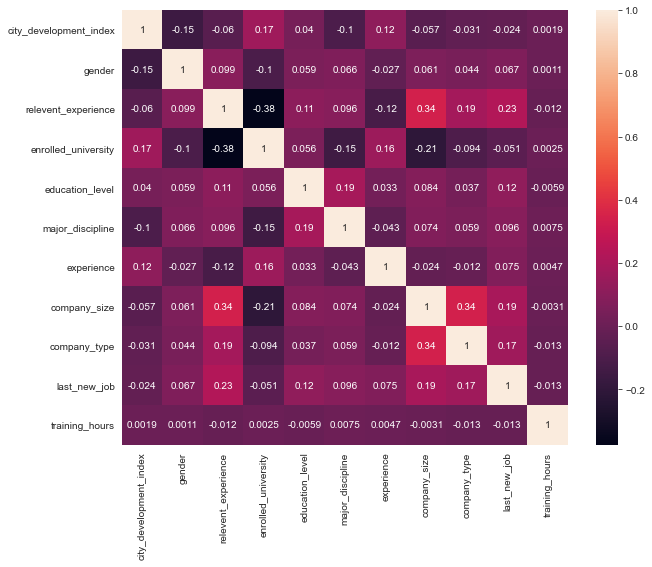

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data_final.corr(), annot=True)

# Final Checking the data after preprocessing

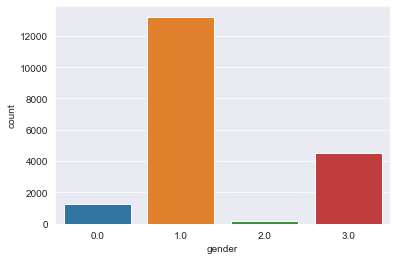

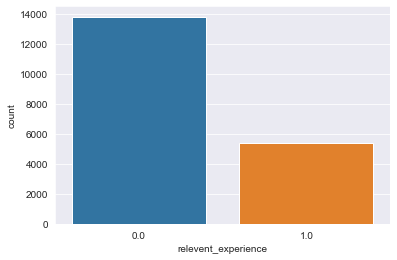

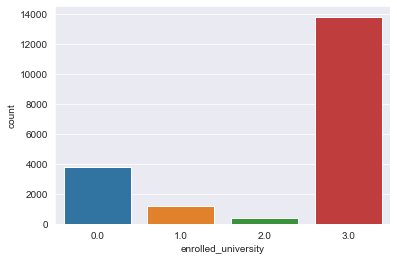

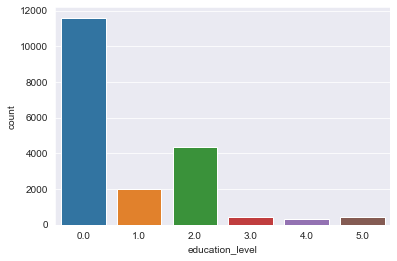

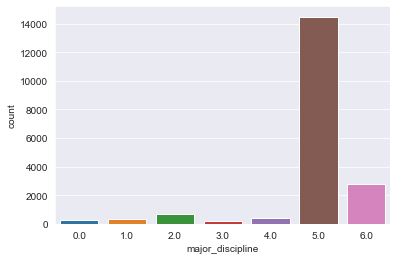

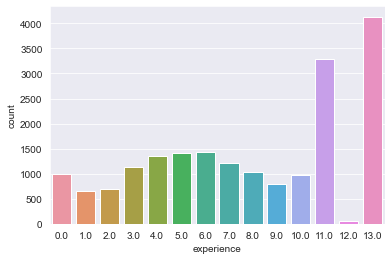

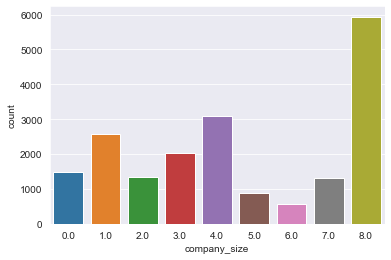

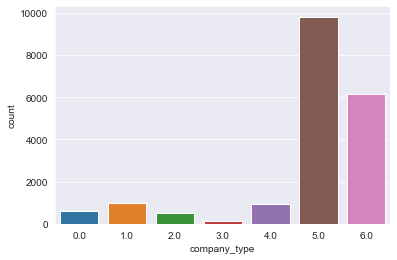

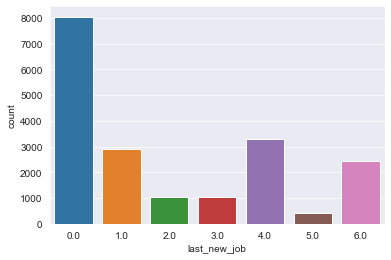

In [32]:
for col in cat_cols:
    plt.figure()
    sns.countplot(train_data_final[col])
        
        
plt.show()

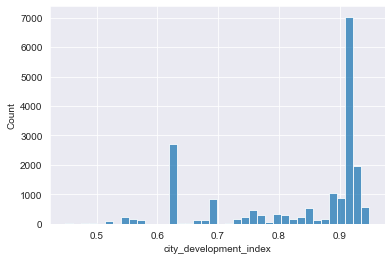

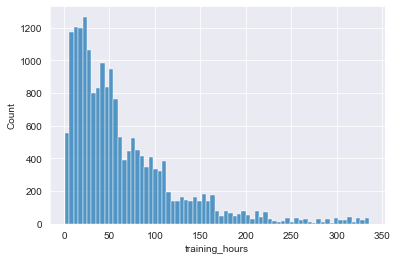

In [33]:
for col in num_cols:
    plt.figure()
    sns.histplot(train_data_final[col])
    
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

X= train_data_final
y= train_data['target']
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, stratify=y,random_state=42)



In [35]:
X_train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
17855,0.624,3.0,0.0,3.0,0.0,5.0,0.0,4.0,5.0,0.0,90.0
17664,0.920,1.0,1.0,3.0,4.0,6.0,6.0,8.0,6.0,6.0,15.0
13404,0.896,1.0,0.0,3.0,0.0,5.0,13.0,2.0,2.0,4.0,36.0
13366,0.920,1.0,0.0,3.0,0.0,5.0,6.0,1.0,1.0,0.0,53.0
15670,0.855,0.0,0.0,0.0,0.0,5.0,6.0,8.0,6.0,0.0,158.0
...,...,...,...,...,...,...,...,...,...,...,...
10398,0.855,3.0,0.0,3.0,0.0,5.0,13.0,4.0,5.0,0.0,94.0
859,0.920,0.0,0.0,3.0,2.0,5.0,0.0,4.0,5.0,0.0,16.0
10566,0.893,0.0,0.0,3.0,2.0,5.0,13.0,1.0,5.0,0.0,34.0
3085,0.624,0.0,0.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,112.0


In [36]:
y_train

17855    0
17664    0
13404    0
13366    0
15670    1
        ..
10398    0
859      0
10566    0
3085     0
3019     1
Name: target, Length: 15326, dtype: int64

**The numerical columns need to be standardized**

In [37]:
ss= StandardScaler()
X_train[num_cols]= ss.fit_transform(X_train[num_cols])
X_test[num_cols]= ss.transform(X_test[num_cols])

In [38]:
X_train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
17855,-1.672102,3.0,0.0,3.0,0.0,5.0,0.0,4.0,5.0,0.0,0.411648
17664,0.734358,1.0,1.0,3.0,4.0,6.0,6.0,8.0,6.0,6.0,-0.839076
13404,0.539240,1.0,0.0,3.0,0.0,5.0,13.0,2.0,2.0,4.0,-0.488873
13366,0.734358,1.0,0.0,3.0,0.0,5.0,6.0,1.0,1.0,0.0,-0.205376
15670,0.205913,0.0,0.0,0.0,0.0,5.0,6.0,8.0,6.0,0.0,1.545638
...,...,...,...,...,...,...,...,...,...,...,...
10398,0.205913,3.0,0.0,3.0,0.0,5.0,13.0,4.0,5.0,0.0,0.478353
859,0.734358,0.0,0.0,3.0,2.0,5.0,0.0,4.0,5.0,0.0,-0.822400
10566,0.514850,0.0,0.0,3.0,2.0,5.0,13.0,1.0,5.0,0.0,-0.522226
3085,-1.672102,0.0,0.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,0.778527


# Training the Data

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [41]:
key= ['LogisticRegression', 'DecisionTreeRegressor', 'DecisionTreeClassifier',  'RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB', 'XGBClassifier', 'SVC']

value= [LogisticRegression(), DecisionTreeRegressor() , DecisionTreeClassifier() ,  RandomForestClassifier() ,  KNeighborsClassifier(), GaussianNB() , XGBClassifier(), SVC()]
models= dict(zip(key, value))

In [42]:
models

{'LogisticRegression': LogisticRegression(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'RandomForestClassifier': RandomForestClassifier(),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'GaussianNB': GaussianNB(),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None),
 'SVC': SVC()}

In [43]:
scores=[]
for key,value in models.items():
    score= -1*cross_val_score(value, X,y, cv=5, scoring='neg_mean_absolute_error')
    scores.append(score)
    print(key, score.mean())

LogisticRegression 0.23859456886437364
DecisionTreeRegressor 0.28796553252801427
DecisionTreeClassifier 0.28974836639239604
RandomForestClassifier 0.21959519882030398
KNeighborsClassifier 0.2751325986390555
GaussianNB 0.24642463225777625
[02:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default e

In [44]:
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= value.score(X_test,y_test)
    
    accuracy_scores.append(accuracy)
    print(key, accuracy)

LogisticRegression 0.7753131524008351
DecisionTreeRegressor -0.5080244655664075
DecisionTreeClassifier 0.7163361169102297
RandomForestClassifier 0.782098121085595
KNeighborsClassifier 0.7685281837160751
GaussianNB 0.7599164926931107
[02:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.7896659707724426
SVC 0.7593945720250522


**XGBClassifier and RandomForestClassifier are the best models**

In [45]:
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[2519  358]
 [ 471  484]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2877
           1       0.57      0.51      0.54       955

    accuracy                           0.78      3832
   macro avg       0.71      0.69      0.70      3832
weighted avg       0.78      0.78      0.78      3832



In [46]:
xgb= XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[02:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2509  368]
 [ 438  517]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2877
           1       0.58      0.54      0.56       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.71      3832
weighted avg       0.78      0.79      0.79      3832



**XGBClassifier is the best model for this data**

In [47]:
params= {'objective':['binary:logistic'],
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)

# Tuning the Hyperparameters

In [48]:
grid= RandomizedSearchCV(xgb, cv=5, verbose=3, param_distributions=params, n_iter=5)

grid.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] subsample=0.6, objective=binary:logistic, min_child_weight=1, max_depth=6, gamma=0.5, colsample_bytree=0.8 
[02:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, objective=binary:logistic, min_child_weight=1, max_depth=6, gamma=0.5, colsample_bytree=0.8, score=0.763, total=   8.6s
[CV] subsample=0.6, objective=binary:logistic, min_child_weight=1, max_depth=6, gamma=0.5, colsample_bytree=0.8 
[02:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


[CV]  subsample=0.6, objective=binary:logistic, min_child_weight=1, max_depth=6, gamma=0.5, colsample_bytree=0.8, score=0.771, total=   9.7s
[CV] subsample=0.6, objective=binary:logistic, min_child_weight=1, max_depth=6, gamma=0.5, colsample_bytree=0.8 
[02:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.2s remaining:    0.0s


[CV]  subsample=0.6, objective=binary:logistic, min_child_weight=1, max_depth=6, gamma=0.5, colsample_bytree=0.8, score=0.764, total=   7.9s
[CV] subsample=0.6, objective=binary:logistic, min_child_weight=1, max_depth=6, gamma=0.5, colsample_bytree=0.8 
[02:52:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, objective=binary:logistic, min_child_weight=1, max_depth=6, gamma=0.5, colsample_bytree=0.8, score=0.753, total=   7.9s
[CV] subsample=0.6, objective=binary:logistic, min_child_weight=1, max_depth=6, gamma=0.5, colsample_bytree=0.8 
[02:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [49]:
grid.best_score_

0.7839539298405656

In [50]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=12, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
grid.best_estimator_.fit(X_train,y_train)
y_pred= grid.best_estimator_.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[02:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2512  365]
 [ 426  529]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2877
           1       0.59      0.55      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.72      3832
weighted avg       0.79      0.79      0.79      3832



# Test Data

In [52]:
test_data= pd.read_csv('aug_test.csv')
test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [53]:
test_data.drop(['enrollee_id', 'city'], axis=1, inplace=True)
test_data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [54]:
mask= test_data['experience'].isin(exp_counts[exp_counts<600].index)
test_data['experience'][mask]= 'other'
test_data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,0.624,Male,No relevent experience,no_enrollment,High School,NaN,other,NaN,Pvt Ltd,never,15
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,other,NaN,Public Sector,4,15
2125,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,other,NaN,NaN,2,30
2126,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [57]:
for col in cat_cols:
    test_data[col]= test_data[col].astype(str)
    test_data[col]= le.fit_transform(test_data[col])
test_data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,1,0,0,0,5,10,7,6,0,21
1,0.920,0,0,3,0,5,6,8,5,0,98
2,0.624,1,1,3,1,6,13,8,5,6,15
3,0.827,1,0,3,2,5,1,0,5,0,39
4,0.920,1,0,3,0,5,11,3,5,4,72
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,1,1,3,0,2,13,8,4,3,15
2125,0.897,1,0,3,2,5,13,8,6,1,30
2126,0.887,1,1,3,4,6,4,8,5,6,18
2127,0.804,1,0,0,1,6,8,1,4,0,84


In [58]:
test_data_final = imputer.transform(test_data)

test_data_final = pd.DataFrame(test_data_final, columns = test_data.columns)

In [59]:
test_data_final[num_cols]= ss.transform(test_data_final[num_cols])

In [60]:
test_data_final

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-0.021725,1.0,0.0,0.0,0.0,5.0,10.0,7.0,6.0,0.0,-0.739018
1,0.734358,0.0,0.0,3.0,0.0,5.0,6.0,8.0,5.0,0.0,0.545059
2,-1.672102,1.0,1.0,3.0,1.0,6.0,13.0,8.0,5.0,6.0,-0.839076
3,-0.021725,1.0,0.0,3.0,2.0,5.0,1.0,0.0,5.0,0.0,-0.438844
4,0.734358,1.0,0.0,3.0,0.0,5.0,11.0,3.0,5.0,4.0,0.111474
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.734358,1.0,1.0,3.0,0.0,2.0,13.0,8.0,4.0,3.0,-0.839076
2125,0.547370,1.0,0.0,3.0,2.0,5.0,13.0,8.0,6.0,1.0,-0.588931
2126,0.466071,1.0,1.0,3.0,4.0,6.0,4.0,8.0,5.0,6.0,-0.789047
2127,-0.208714,1.0,0.0,0.0,1.0,6.0,8.0,1.0,4.0,0.0,0.311590


In [61]:
test_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  2129 non-null   float64
 2   relevent_experience     2129 non-null   float64
 3   enrolled_university     2129 non-null   float64
 4   education_level         2129 non-null   float64
 5   major_discipline        2129 non-null   float64
 6   experience              2129 non-null   float64
 7   company_size            2129 non-null   float64
 8   company_type            2129 non-null   float64
 9   last_new_job            2129 non-null   float64
 10  training_hours          2129 non-null   float64
dtypes: float64(11)
memory usage: 183.1 KB


In [62]:
predictions= grid.best_estimator_.predict(test_data_final)

# Final Predictions on Test Dataset

In [63]:
my_array = predictions
print(my_array)
np. set_printoptions(threshold=np. inf)
print(my_array)



[0 0 1 ... 0 0 0]
[0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 